Compressing the initial image to 64 colors
Initial uncompressed figure:


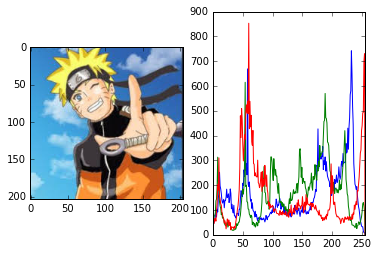

After initialization of the means reconstruction error is 85443951.0 :


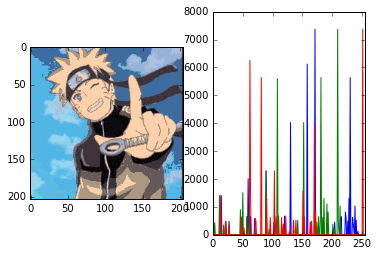

/Users/akutvone/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:56: RuntimeWarning: invalid value encountered in true_divide


After 3 iterations reconstruction error is 22691748.9046 :


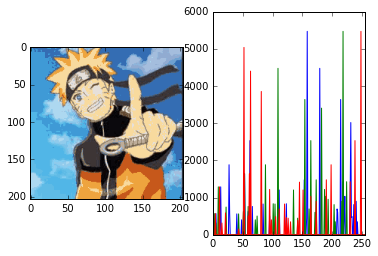

After 6 iterations reconstruction error is 16467497.0068 :


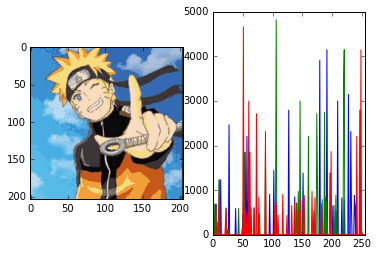

After 9 iterations reconstruction error is 15125656.1988 :


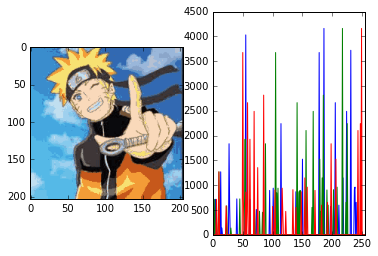

Compressing the initial image to 64 colors
Initial uncompressed figure:


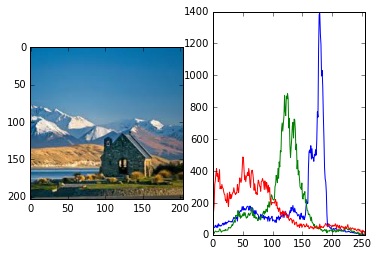

After initialization of the means reconstruction error is 26762557.0 :


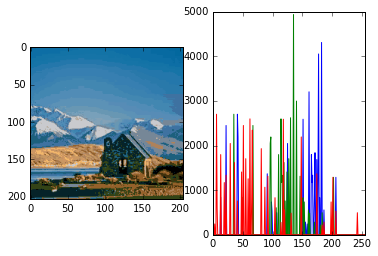

After 3 iterations reconstruction error is 11168866.6259 :


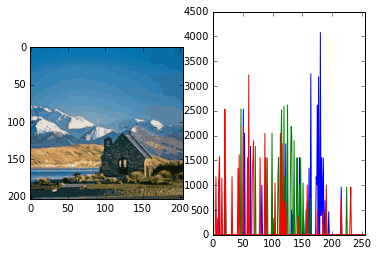

After 6 iterations reconstruction error is 9830600.8421 :


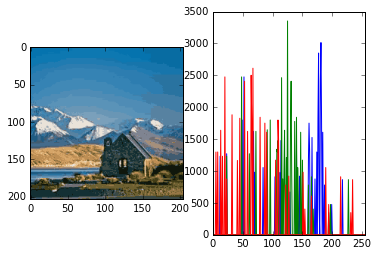

After 9 iterations reconstruction error is 9504391.68936 :


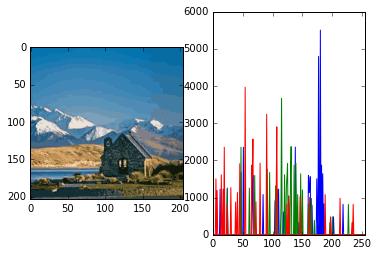

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import copy

%matplotlib inline

#allocate and initialize
def Initialize(fig,knum):
    means=np.zeros((knum,fig.shape[2]))
    figsize=fig.shape[1]
    clustersize=np.zeros((knum)) #for tracking the clustersizes   
    outputimage = copy.deepcopy(fig) #for outputimage
    idx=np.zeros((figsize,figsize)) # tells into which cluster a certain pixel belongs to
    
    #pick initial centroid values uniformly from the figure diagonals (like X shape)
    half=int(knum/2)
    increment=int(figsize/(half+1))
    
    for i in range(half):        
        means[i,:]=fig[(i+1)*increment,(i+1)*increment]
        
    for i in range(half):        
        means[i,:]=fig[(i+1)*increment,(half-i)*increment]
        
    return means, figsize, idx, clustersize, outputimage

def Updateclusters(fig,means,figsize,idx,knum):
    
    #loop over pixels
    for i in range(figsize):
        for j in range(figsize):
            
            min_dist=10000000
            #find the nearest mean
            for k in range(knum):
                dist=np.sum((fig[i,j,:] - means[k,:]) ** 2)
                if dist<min_dist:
                    min_dist=dist
                    idx[i,j]=k
    return idx
                    
def Updatemeans(fig,means,figsize,idx,knum,clustersize):
    
    means[:,:]=0 #reset means
    clustersize[:]=0 #reset clustersize

    for i in range(figsize):
        for j in range(figsize):
            clusterindex=int(idx[i,j])
            means[clusterindex,:] += fig[i,j]
            clustersize[clusterindex] += 1
            
    #normalize
    for k in range(knum):
        means[k,:]=means[k,:]/clustersize[k]
        
    return means
    
def Reconst_err(fig,means,figsize,idx,knum):
    
    err=0
    for i in range(figsize):
        for j in range(figsize):
            ind=int(idx[i,j])
            err += np.sum((fig[i,j,:]-means[ind,:])**2)
            
    return err

def Decodeimage(means,figsize,idx,outputimage):
    
    for i in range(figsize):
        for j in range(figsize):
            ind=int(idx[i,j])
            outputimage[i,j]=means[ind,:]
    
    return outputimage

def Plotfighist(fig,title): #plot figure and histrogram next to it
    
    print(title)
    
    plt.figure()
    plt.subplot(121)
    #cv2 uses bgr and matplotlib rgb, thus the colorspace have to be changed
    plt.imshow(cv2.cvtColor(fig, cv2.COLOR_BGR2RGB))

    #plot histrogram
    plt.subplot(122)
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([fig],[i],None,[256],[0,255])
        plt.plot(histr,color = col)
        plt.xlim([0,255]) 
    plt.show()
    
    #main program which calls the functions defined above
def Main(fig,knum,iterations,print_every):
    
    print("Compressing the initial image to " + str(knum) + " colors")

    #plot uncompressed figure
    Plotfighist(fig,"Initial uncompressed figure:")

    #allocate and initialize
    means,figsize,idx,clustersize,outputimage=Initialize(fig,knum)
    #update clusters, see which data points belong to which clusters
    idx=Updateclusters(fig,means,figsize,idx,knum)


    #plot and calculate error after initial guessing of the means:
    reconsterrors=np.zeros((iterations))
    outputimage=Decodeimage(means,figsize,idx,outputimage)
    initerror= Reconst_err(fig,means,figsize,idx,knum)

    Plotfighist(outputimage,"After initialization of the means reconstruction error is "+str(initerror) +" :")



    #k-means iterations loop

    for i in range(iterations):

        #calculate the means of the new clusters
        means=Updatemeans(fig,means,figsize,idx,knum,clustersize)

        #update clusters, see which data points belong to which clusters
        idx=Updateclusters(fig,means,figsize,idx,knum)

        #calculate reconstration error
        reconsterrors[i]=Reconst_err(fig,means,figsize,idx,knum)    

        #print the output and histrogram every print_every strep
        if np.mod(i+1,print_every)==0:

            #make output image
            outputimage=Decodeimage(means,figsize,idx,outputimage)

            #plot output
            Plotfighist(outputimage,"After "+str(i+1)+" iterations reconstruction error is "+str(reconsterrors[i])+" :")

    
                
#PROGRAM settings---------------------------
#input pictures
naruto=cv2.imread('naruto.jpeg')
landscape=cv2.imread('landscape.jpeg')

knum=64 #number of clusters
iterations=9 #number of iterations
print_every=3

#RUN PROGRAM
Main(naruto,knum,iterations,print_every)
Main(landscape,knum,iterations,print_every)      